<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd

In [185]:
teste = pd.read_csv('/content/test.csv')

In [186]:
treino = pd.read_csv('/content/train.csv')

In [187]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [188]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Primeiro faço as analises1 com treino pq é mais convecional

In [189]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Os valores nulos da idade e Embarked podem ser preenchidos com valores da moda

O inplace ele vai modificar permanentemente o dataset

In [190]:
treino['Age'].fillna(treino['Age'].mode()[0], inplace=True)

In [191]:
treino['Embarked'].fillna(treino['Embarked'].mode()[0], inplace=True)

Remover dados  duplicados, pois quando é duplicado significa que toda linha é igual

In [192]:
treino = treino.drop_duplicates()
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Como os valores da coluna Cabin são muitos valores nulos, vou retirar essa coluna. De todo modo, cabine é apenas pra identificação, não é uma variável que se constroi algo, não influencia em nada

In [193]:
treino.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)

Irei verificar quantos tipos existem em cada varivável categórica

In [194]:
treino['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [195]:
treino['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Existem dois tipos de modelos de categorização (que é transformar string em um tipo numérico).

1- onehotencoder a codificação one-hot é usada para converter variáveis ​​categóricas em um formato que pode ser facilmente usado por algoritmos de aprendizado de máquina .

A ideia básica da codificação one-hot é criar novas variáveis ​​que assumem os valores 0 e 1 para representar os valores categóricos originais.

Por exemplo, a imagem a seguir mostra como executaríamos codificação one-hot para converter uma variável categórica que contém nomes de equipe em novas variáveis ​​que contêm apenas valores 0 e 1:

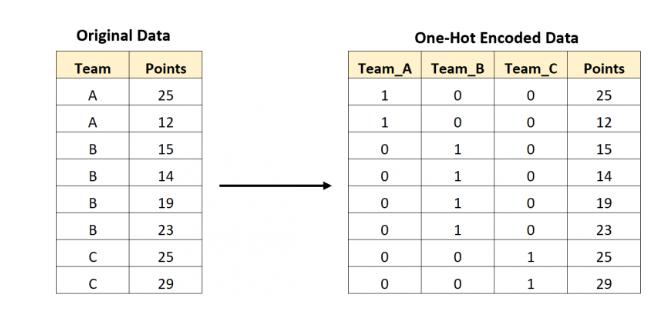


2- labelencoder é usado quando existem uma ordem entre as categorias. Ele transforma cada elemento da coluna em valores numeros de relevância.

Usando onehotencoder em ambas as colunas

Etapa 2: executar a codificação One-Hot
Em seguida, vamos importar a função OneHotEncoder() da biblioteca sklearn e usá-la para executar a codificação one-hot na variável 'team' no pandas DataFrame:

In [196]:
from sklearn.preprocessing import OneHotEncoder

#creando um objeto do tipo one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#Está aplicando one-hot encoding nas colunas 'Sex', 'Embarked' 
encoder_treino = pd.DataFrame(encoder.fit_transform(treino[['Sex', 'Embarked']]).toarray())

# juntando as novas colunas numéricas criadas com o dataframe original
final_treino = treino.join(encoder_treino)

#ver resultado final do dataset treino
display(final_treino)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,0,3,female,24.0,1,2,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,1,1,male,26.0,0,0,30.0000,C,0.0,1.0,1.0,0.0,0.0


Etapa 3: Elimine a variável categórica original
Por fim, podemos descartar a variável 'Sex','Embarked', original do DataFrame, pois não precisamos mais dela:



In [197]:
 final_treino.drop(columns=['Sex','Embarked'], axis= 1 , inplace= True)

In [198]:
final_treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


Também poderíamos renomear as colunas do DataFrame final para facilitar a leitura:

In [199]:
final_treino.columns = ['Survived',	'Pclass',	'Age','SibSp', 'Parch',	'Fare','Male', 'Female', 'Cherbourg', 'Queenstown', 'Southampton'] 

In [200]:
final_treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


Precisamos separar as variáveis target (y) das preditoras (x)

In [201]:
y = final_treino['Survived']

x = final_treino.drop('Survived', axis=1)

In [202]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [203]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Verificando a presença de outliers pra ver se existe alguma linha a ser removida ou também ver qual tipo de escalonamento deve ser utilizado. Os dois principais são:

1- MinMaxScaler, que transforma os dados entre 0 e 1. É mais usado para datasets com pouco outliers;

2- StandardScaler, é usado quando não há intervalos definidos. É uma boa técnica quando se tem muitos outliers.

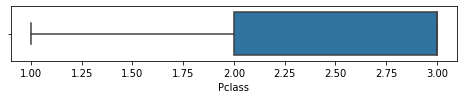

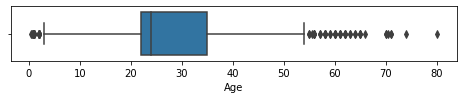

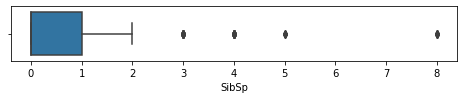

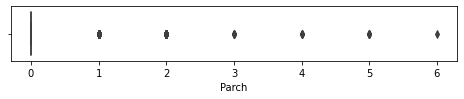

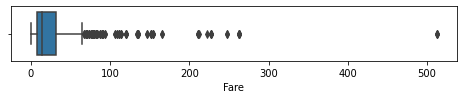

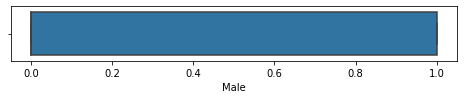

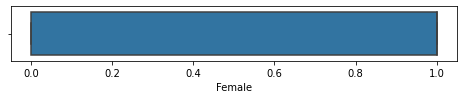

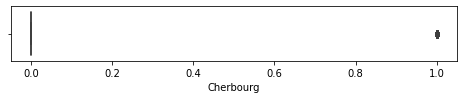

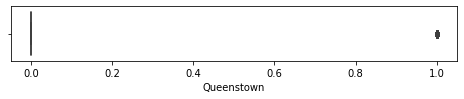

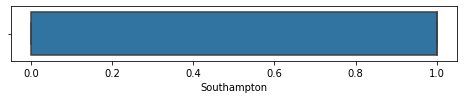

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in x:
        plt.figure(figsize=(8,1))
        sns.boxplot(data=x, x=column)

Vericando que se têm muitos outliers, não queremos remover pois são passageiros relevantes. Apenas aplicar o escalonamento adequado pra aproveitar esses dados. Esse escalonamento é feito com as variáveis preditivas então vamos pegar o dataset de x

In [209]:
from sklearn.preprocessing import StandardScaler
 
 #instaciando
std_scaler = StandardScaler()
 
 #aplicando transformação
treino_scaled = std_scaler.fit_transform(x.to_numpy())
treino_scaled = pd.DataFrame(treino_scaled, columns= [
    'Pclass',	'Age','SibSp', 'Parch',	'Fare','Male', 
    'Female', 'Cherbourg', 'Queenstown', 'Southampton'
])
  
treino_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,0.827377,-0.497793,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.715048,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.194583,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.487640,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.487640,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838


Agora que estão tudo na mesma escala, vamos testar os modelos de classificação, os mais usados são:

1- Árvore de Decisão/Floresta Aleatória
2- K-Nearest Neighbors (KNN)
3- Análise Discriminante Linear 
4- Regressão logística
5- Naive Bayes
6- Support Vector Machines (SVMs) 
7- CatBoost

Nesse caso tem que testar os que mais se adequam a problemática. Antes de aplicar modelo de classificaçao, preciso aplicar as mesmas metodologias de transaformação para a variável de teste, pois até então só tinha sido aplicado no treino.

In [210]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [211]:
teste.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)

In [212]:
teste['Age'].fillna(teste['Age'].mode()[0], inplace=True)


In [213]:
teste['Embarked'].fillna(teste['Embarked'].mode()[0], inplace=True)

In [214]:
teste = teste.drop_duplicates()
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    375 non-null    int64  
 1   Sex       375 non-null    object 
 2   Age       375 non-null    float64
 3   SibSp     375 non-null    int64  
 4   Parch     375 non-null    int64  
 5   Fare      374 non-null    float64
 6   Embarked  375 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.4+ KB


In [217]:
teste.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)

KeyError: ignored